In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Отображение 9 знаков после запятой в итоговой таблице
pd.set_option('display.float_format', lambda x: '%.9f' % x)

In [2]:
# Входные данные
INTERVAL_START = 2  # a0
INTERVAL_END = 200  # b0
TOLERANCE = 0.0001  # точность

In [3]:
# Исходная функция
def f(x):
    return (x - 15) ** 2 + 5

In [4]:
SQRT_5 = math.sqrt(5)  # константный корень из 5 (чтобы не вычислять каждый раз)

# n-ное число Фибоначчи (формула Бинэ с округлением)
def fib(n) -> int:
    raw = 1 / SQRT_5 * (((1 + SQRT_5) / 2) ** n - ((1 - SQRT_5) / 2) ** n)
    return round(raw)

In [5]:
# Первые 10 чисел Фибоначчи
[fib(i) for i in range(1, 11)]

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

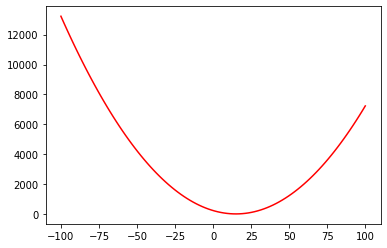

In [6]:
# График исходной функции
space = np.linspace(-100, 100, 100)
func = f(space)

fig = plt.figure()
plt.plot(space, func, 'r')

In [7]:
# Выбор n
n = 1
while fib(n + 2) <= (INTERVAL_END - INTERVAL_START) / TOLERANCE:
    n += 1

n

30

In [8]:
# Точки на начальном интервале
x1 = INTERVAL_START + (fib(n) / fib(n + 2)) * (INTERVAL_END - INTERVAL_START)
x2 = INTERVAL_START + (fib(n + 1) / fib(n + 2)) * (INTERVAL_END - INTERVAL_START)

# Значения функции в этих точках
y1 = f(x1)
y2 = f(x2)
((x1, y1), (x2, y2))

((77.62927022750216, 3927.4254892294884),
 (124.37072977249784, 11966.956530968746))

In [10]:
current_start = INTERVAL_START
current_end = INTERVAL_END

# Поиск минимума
while n > 1:
    n -= 1

    if y1 > y2:
        # Сдвиг "вправо"
        current_start = x1
        x1 = x2
        x2 = current_end - (x1 - current_start)
        y1 = y2
        y2 = f(x2)
    else:
        # Сдвиг "влево"
        current_end = x2
        x2 = x1
        x1 = current_start + (current_end - x2)
        y2 = y1
        y1 = f(x1)
x_extr = (x1 + x2) / 2

(x_extr, f(x_extr))

(14.999997558804587, 5.00000000000596)

In [16]:
# Весь алгоритм в одной функции
def fib_extr(start, end, tolerance):
    stats = pd.DataFrame(columns=['Номер итерации', 'A', 'B', 'Длина интервала', 'Точка', 'Значение функции'])
    stats.set_index('Номер итерации', inplace=True)

    n = 1
    while fib(n + 2) <= (end - start) / tolerance:
        n += 1
    
    x1 = start + (fib(n) / fib(n + 2)) * (end - start)
    x2 = start + (fib(n + 1) / fib(n + 2)) * (end - start)

    y1 = f(x1)
    y2 = f(x2)

    current_start = start
    current_end = end

    current_iter = 0
    stats.loc[current_iter] = [current_start, current_end, current_end - current_start, (x1 + x2) / 2, f((x1 + x2) / 2)]
    while n > 1:
        current_iter += 1
        n -= 1

        if y1 > y2:
            current_start = x1
            x1 = x2
            x2 = current_end - (x1 - current_start)
            y1 = y2
            y2 = f(x2)
        else:
            current_end = x2
            x2 = x1
            x1 = current_start + (current_end - x2)
            y2 = y1
            y1 = f(x1)
        x_extr = (x1 + x2) / 2
        stats.loc[current_iter] = [current_start, current_end, current_end - current_start, x_extr, f(x_extr)]

    return stats, current_iter

In [17]:
fib_extr(INTERVAL_START, INTERVAL_END, TOLERANCE)[0]

A             B  Длина интервала         Точка  \
Номер итерации                                                             
0               2.000000000 200.000000000    198.000000000 101.000000000   
1               2.000000000 124.370729772    122.370729772  63.185364886   
2               2.000000000  77.629270228     75.629270228  39.814635114   
3               2.000000000  48.741459545     46.741459545  25.370729772   
4               2.000000000  30.887810683     28.887810683  16.443905341   
5               2.000000000  19.853648862     17.853648862  10.926824431   
6               8.819487042  19.853648862     11.034161820  14.336567952   
7              13.034161820  19.853648862      6.819487042  16.443905341   
8              13.034161820  17.248836598      4.214674778  15.141499209   
9              13.034161820  15.638974084      2.604812264  14.336567952   
10             14.029111571  15.638974084      1.609862514  14.834042828   
11             14.644024334  15.638974084      0.994949751  15.141499209   
12             14.644024334  15.258937097      0.614912763  14.951480715   
13             14.878900109  15.258937097      0.380036988  15.068918603   
14             14.878900109  15.113775885      0.234875775  14.996337997   
15             14.968614672  15.113775885      0.145161212  15.041195279   
16             14.968614672  15.058329236      0.089714563  15.013471954   
17             14.968614672  15.024061321      0.055446649  14.996337997   
18             14.989793407  15.024061321      0.034267914  15.006927364   
19             14.989793407  15.010972142      0.021178735  15.000382775   
20             14.989793407  15.002882587      0.013089179  14.996337997   
21             14.994793031  15.002882587      0.008089555  14.998837809   
22             14.997882963  15.002882587      0.004999624  15.000382775   
23             14.997882963  15.000972894      0.003089932  14.999427928   
24             14.999063202  15.000972894      0.001909692  15.000018048   
25             14.999063202  15.000243441      0.001180239  14.999653321   
26             14.999513988  15.000243441      0.000729453  14.999878714   
27             14.999792655  15.000243441      0.000450786  15.000018048   
28             14.999792655  15.000071322      0.000278667  14.999931989   
29             14.999899204  15.000071322      0.000172119  14.999985263   
30             14.999964774  15.000071322      0.000106549  15.000018048   
31             14.999964774  15.000030344      0.000065570  14.999997559   
32             14.999989365  15.000030344      0.000040978  15.000009855   
33             14.999989365  15.000013957      0.000024592  15.000001661   
34             14.999989365  15.000005752      0.000016387  14.999997559   

                Значение функции  
Номер итерации                    
0                 7401.000000000  
1                 2326.829389220  
2                  620.766115829  
3                  112.552036014  
4                    7.084862635  
5                   21.590759214  
6                    5.440142082  
7                    7.084862635  
8                    5.020022026  
9                    5.440142082  
10                   5.027541783  
11                   5.020022026  
12                   5.002354121  
13                   5.004749774  
14                   5.000013410  
15                   5.001697051  
16                   5.000181494  
17                   5.000013410  
18                   5.000047988  
19                   5.000000147  
20                   5.000013410  
21                   5.000001351  
22                   5.000000147  
23                   5.000000327  
24                   5.000000000  
25                   5.000000120  
26                   5.000000015  
27                   5.000000000  
28                   5.000000005  
29                   5.000000000  
30                   5.000000000  
31                   5.000000000  
32                   5.

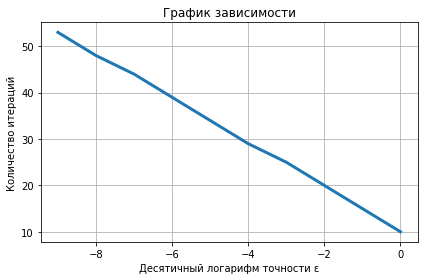

In [18]:
reference_points = [(math.log10(10 ** (-1 * p)), fib_extr(INTERVAL_START, INTERVAL_END, (10 ** (-1 * p)))[1]) for p in range(10)]

fig = plt.figure()
plt.title('График зависимости')
plt.xlabel('Десятичный логарифм точности ε')
plt.ylabel('Количество итераций')
plt.plot([point[0] for point in reference_points], [point[1] for point in reference_points], lw=3)
plt.tight_layout()
plt.grid()
plt.show()